<a href="https://colab.research.google.com/github/hida0/ESAA-2022-2/blob/HW/Week13_HW2_%EC%BC%80%EB%9D%BC%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 교재필사
(파이썬 딥러닝 텐서플로 ch3. 1-4 pg. 50~95)

## 1. 딥러닝 준비


## 1-1. 주요 용어
### 1-1-1. 하이퍼파라미터
- 하이퍼 파라미터는 딥러닝 뿐만 아니라 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값을 의미한다.
- 모델이 훈련하면서 자동 업데이트하고 조정하는 가중치와 편향과는 다르게 학습 속도나 반복 훈련 횟수 등 사용자가 직접 설정해야 하는 값들이다.
- 모델의 예측 성능을 높이기 위해 하이퍼파라미터 값들을 조절하는데 많은 시간을 투자하는 것이 일반적이다. 이처럼 하이퍼파라미터의 값을 조절하는 행위를 하이퍼파라미터 튜닝이라고 한다.

### 1-1-2. 과소적합 vs 과대적합
- 데이터는 머신러닝이 모델이 학습할 데이터인 훈련용 데이터 train set과 정답 레이블이 없는 머신러닝 모델이 예측해야하는 대상 데이터인 예측용 데이터 test set으로 나뉜다.
- 머신러닝은 주어진 훈련 데이터에서 패턴 학습을 통해 모델을 완성해나간다. 하지만 예측할 데이터가 모델이 학습한 데이터와 다른 분포를 갖거나, 혹은 학습한 데이터가 특정 레이블에 편향된 데이터로 이루어져 있다면 모델이 학습한 후 예측 성능이 현저히 떨어진다.
- **모델이 충분히 학습되지 않은 경우**에 예측 성능이 떨어지며 이 상태를 **과소적합**되었다고 한다.
- 반대로 **학습 데이터를 지나치게 반복 학습**하여 과하게 적합된 상태를 **과대적합**되었다고 한다. 이 상태에서는 훈련 데이터의 불필요한 노이즈까지 과도하게 모델에 반영되어 주어진 훈련 데이터에서는 예측 성능이 좋지만, 정작 예측 데이터에 대한 예측 오차가 발생할 확률이 커진다.
- 모델을 학습시킬 때는 과소적합과 과대적합 문제를 최소화하면서 정확도를 가장 높일 수 있도록 해야 한다. 훈련 데이터를 예측 데이터와 분포가 동일하게 구성해야 하고, 불필요한 노이즈는 전처리를 통해 해소해야 한다.
- 또한 훈련 데이터의 일부를 검증 데이터로 활용하여 검증 성능이 가장 좋은 구간을 모델의 가장 이상적으로 학습된 지점이라 판단하는 방법으로 최종 모델을 결정한다.

### 1-1-3. 에포크(epoch)
- 딥러닝은 데이터셋을 학습하는 과정을 여러번 반복(iteration)하면서 최적의 모델 가중치를 찾는 과정이다. 
- 딥러닝 모델이 **반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프**를 **1 에포크(epoch)**라고 한다.
- 훈련 데이터셋을 빠짐없이 모두 1번 모델 훈련에 사용하면 1 epoch의 훈련 과정을 마치고 다음 epoch로 넘어간다. 이때 사전에 설정된 최대 epoch 횟수까지 반복적으로 진행하고 종료된다.

### 1-1-4. 손실함수(loss function)
- **손실함수는 예측 값과 정답 값의 차이 또는 오차**라고 할 수 있다. 오차는 딥러닝 모델의 출력 값과 실제 값과의 차이를 말한다.
- 딥러닝 모델에 적용하는 손실함수는 사용자가 정의하며, 분류나 회귀 모델에 따라 손실함수를 다르게 적용하는 일반적이다.
- 지도학습의 분류 문제는 이진분류와 다중분류로 구분할 수 있다. 
 - 이진분류는 `binary_crossentropy` 손실함수를 사용하며, 출력층의 활성화 함수로`sigmoid`를 사용한다.
 - 다중분류는 `categorical_crossentropy` 손실함수를 사용하며, 다중분류의 대상이 되는 클래스가 원핫 벡터인 경우 사용한다. 만약 정답 클래스가 레이블 값으로 표현되어  서로 다른 숫자로 구분되어 있으면 `sparse_crossentropy` 손실함수를 사용한다. 출력층의 활성화 함수로`softmax`를 사용한다.
---
- 회귀 모델의 경우 평균제곱오차(MSE), 평균절대값오차(MAE), 후버(Huber) 등이 사용된다.

### 1-1-5. 경사하강법(Gradient Descent)
- 경사하강법은 딥러닝 모델을 훈련할 때 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법이다. 
- 경사하강법을 넘파이로 직접 구현한다.
- 먼저 손실함수 또는 목적 함수를 다음과 같이 정의한다. Loss=$\frac{1}{2}\sum_{i=1}(y-\hat y)^2$
- 다음의 단순 선형 회귀 수식이 주어졌을 때 손실함수를 최소로하는 w와 b를 구하는 과정을 경사하강법으로 구한다. $y=wx+b$
- 샘플 데이터셋을 생성하는 함수를 정의하고 임의의 w와 b 값을 지정하여 주어진 x에 대한 y 값을 생성하며, 약간의 노이즈를 추가한다.
- 그림을 보면 실제 생성된 y 데이터는 $y=0.3x+0.5$와 완벽히 일치하지 않고 약간의 노이즈가 추가되었다.

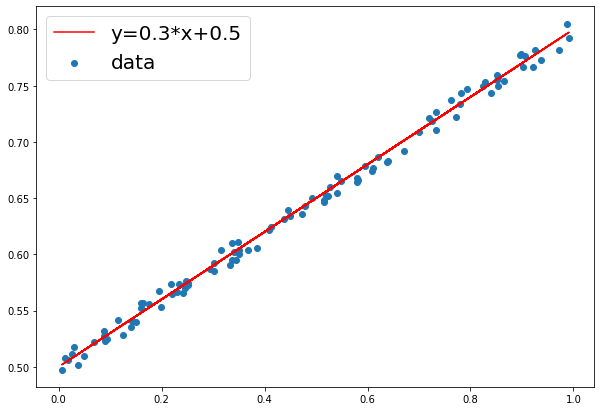

w : 0.3, b:0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#샘플에 활용할 데이터셋 생성
def make_linear(w, b, size=50, noise=1.0):
    x=np.random.rand(size)
    y=w*x+b
    noise=np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy=y+noise
    plt.figure(figsize=(10,7))
    plt.plot(x, y, color='r', label=f'y={w}*x+{b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w : {w}, b:{b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

### 1-1-5. 경사하강법(Gradient Descent)
- 이제 w, b에 대한 그래디언트를 구하는 부분을 구현한다.
- 그래디언트는 손실함수를 w, b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전의 w, b로부터 차감한다.
- 정의된 그래디언트 w, b 업데이트 수식을 이용하여 넘파이로 최적화하는 과정을 구현한다.
- 최대 반복 횟수를 지정하고, 오차가 0.005 이내로 수렴하면 반복문을 종료한다. 반복문 안에서 손실함수를 정의하고, 매 epoch 마다 w, b에 대한 가중치를 업데이트한다.
---
- 최종적으로 목표하는 오차 범위 안으로 수렴하여 반복문을 종료하고, 종료 후 w, b 계수를 확인하면 샘플 데이터셋을 생성할 때 설정한 w, b의 계수와 비슷한 값임을 확인할 수 있다.

In [ ]:
#최대 반복 횟수
num_epoch =1000
#학습률 learning rate
learning_rate = 0.005
#에러 기록
errors = []
#random한 값으로 w, b 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    #가설함수 정의
    y_hat = w*x + b
    #loss function 정의
    error = 0.5*((y_hat-y)**2).sum()
    #오차가 0.005 이내로 수렴하면 종료
    if error < 0.005:
        break
        
    #gradient 미분 계산 
    w = w-learning_rate * ((y_hat-y)*x).sum()
    b = b-learning_rate * (y_hat-y).sum()
    errors.append(error)
    if epoch % 5 == 0:
        print('{0:2} w = {1:.5f}, b={2:.5f} error={3:.5f}'.format(epoch, w, b, error))
        
print('----' * 15)
print('{0:2} w = {1:.5f}, b={2:.5f} error={3:.5f}'.format(epoch, w, b, error))

 0 w = 0.48577, b=0.33861 error=1.51687
 5 w = 0.47829, b=0.40039 error=0.14764
10 w = 0.45127, b=0.41577 error=0.10692
15 w = 0.42821, b=0.42861 error=0.07757
20 w = 0.40862, b=0.43952 error=0.05640
25 w = 0.39198, b=0.44879 error=0.04113
30 w = 0.37785, b=0.45666 error=0.03012
35 w = 0.36585, b=0.46335 error=0.02217
40 w = 0.35566, b=0.46902 error=0.01644
45 w = 0.34700, b=0.47384 error=0.01231
50 w = 0.33965, b=0.47794 error=0.00933
55 w = 0.33340, b=0.48142 error=0.00717
60 w = 0.32810, b=0.48437 error=0.00562
------------------------------------------------------------
63 w = 0.32621, b=0.48543 error=0.00491


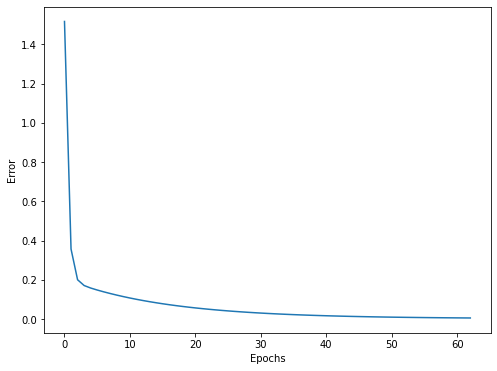

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## 1-2. 딥러닝 프로세스
- 딥러닝 모델 구축 및 훈련을 위해서는 다음과 같은 프로세스를 따른다.
- 데이터 로드 -> 데이터 전처리 -> 데이터 분할 -> 모델 생성&컴파일 -> 훈련 -> 검증 -> 예측

### 1-2-1. 데이터 전처리
- 데이터를 모델에 주입하기 전에 데이터를 가공하는 단계이다.
- 전처리 단계에서 데이터셋의 형태나 차원을 미리 구상해야 다음 단계에서 모델을 설계할 때 입력할 데이터 셋의 형태를 올바르게 정의할 수 있다.

### 1-2-2. 모델 생성
- 모델의 구조를 정의하고 생성하는 단계다.
- 모델을 생성하는 방법은 크게 3가지로 구분할 수 있다. 순차적인 구조의 모델은 Sequential API로 구현한다. 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델은 Functional API 혹은 Model Subclassing 방법으로 구현할 수 있다.


### 1-2-3. 모델 컴파일
- 딥러닝 모델의 구조를 정의하고 생성한 뒤에는 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등을 정의한다.
- 모델 인스턴스에 **`compile()`** 메소드를 적용하고, 앞에서 열거한 여러 가지 속성 값을 정의한다.

### 1-2-4. 모델 훈련
- 모델을 훈련하는 단계로, **`fit()`** 함수에 모델 훈련에 필요한 정보를 매개변수로 전달한다.

### 1-2-5. 모델 검증
- 훈련이 완료된 모델을 검증하는 단계이다.
- 모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표를 계산한다.
- 검증 결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델 수정을 하고, 컴파일 및 훈련 과정을 거쳐 재평가하는 단계를 통해 목표 성능에 도달할 때까지 이 과정을 반복한다.

### 1-2-6. 모델 예측
- 훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 그 결과를 반환한다.

## 2. 단순 신경망 훈련
## 2-1. 선형 회귀
- 회귀 분석이란 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계기법이다. 
- 그 중에서도 단순선형회귀 모형은 하나의 X가 Y에 미치는 영향을 추정하며, 1차 함수 관계로 나타낼 수 있다.
- 앞으로 텐서플로 케라스를 활용하여 단순선형회귀 모델을 직접 만들고 딥러닝을 학습한다. 이때 모델은 1차 함수식과 동일하며 다음과 같이 정의한다. $y=wx+b$, 
$w$는 가중치이고, $b$는 편향이다.

## 2-2. 뉴런
- 뉴런은 인공 신경망 모델을 구성하는 하나의 신경을 의미한다. 
- **신경망은 여러 개의 레이어**를 가지며, **1개의 레이어는 1개 이상의 뉴런으로 구성**된다.
- 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트된다.

## 2-3. Dense 레이어
- **Dense 레이어**는 **심층 신경망 모델을 구성하는 가장 기본 레이어**이다. 각 레이어와 레이어 사이의 모든 뉴런이 서로 연결되어 있기 때문에 **완전 연결층**이라고 부르기도 한다.
- 아래 그림은 4개의 Dense 레이어로 구성된 모델이다. 입력 레이어 1개, 은닉 레이어 2개, 출력 레이어 1개로 구성된다. 각 레이어는 1개 이상의 뉴런으로 구성된다.
- 모든 뉴런들이 정보의 흐름을 나타내는 화살표로 연결되어 있어서 완전 연결층이라고 정의한다.
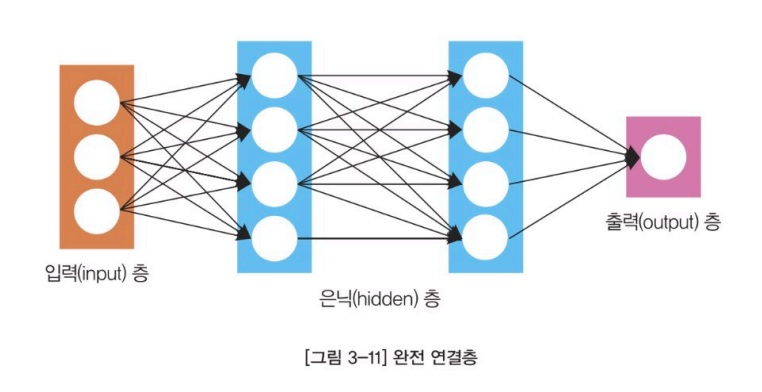
- Dense 레이어를 구성하는 노드 개수와 활성화 함수를 지정할 수 있다. 텐서플로의 **`layer`** 모듈에 있는 **`Dense`** 레이어에 노드의 개수를 첫번째 위치 인자로 지정하면 된다. 

## 2-4. 데이터셋 만들기
- 단순선형회귀 모형을 지도학습 방식으로 훈련하기 위해 x, y 데이터를 생성한다. 임의의 1차 함수 $y=3x+2$ 관계식을 이용한다.
- 시각화하면 x, y 데이터는 기울기 3을 갖는 직선 그래프로 그려진다.

In [ ]:
import tensorflow as tf

#10개의 node로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

In [ ]:
import numpy as np

#샘플 데이터셋 생성
x = np.arange(1,6)
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


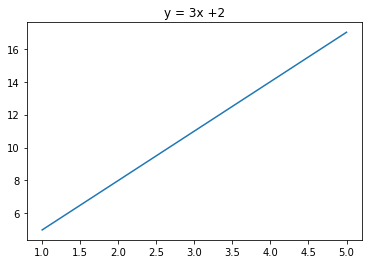

In [ ]:
plt.plot(x,y)
plt.title('y = 3x +2')
plt.show()

## 2-5. Sequential API
- Sequential API 방식은 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식이다. 따라서 입력 레이어부터 출력 레이어까지 순서를 갖는다.
- 입력 데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고, 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산을 수행한다.

### 2-5-1. 모델 구조
- Sequential API를 사용하여 모델 생성 시 다음과 같은 2가지 방법으로 모델을 구성할 수 있다. 
- 하나는 리스트 형 정의로 **`Seqential`** 클래스 함수에 파이썬 리스트 형태로 여러 개의 층을 입력한다. 대괄호 안에 쉼표로 구분하여 층을 쌓는다.
- 다른 하나는  **`Sequential`** 클래스 객체를 먼저 만든 위에 **`add`** 함수로 생성된 모델 인스턴스에 레이어 층을 추가하는 방식이다. 여러 개의 층을 추가하려면 **`add`** 함수를 여러번 사용한다.

### 2-5-2. 입력 데이터 형태
- Sequential API를 사용하여 모델을 구성할 때 첫번째 층은 반드시 **`input_shape`** 매개변수를 튜플 혹은 리스트로 지정해야 한다. 
- 예를 들어 데이터셋의 shape가 (150, 4)라고 한다면 4개의 입력 변수가 존재한다는 뜻으로, **`input_shape=(4,) 또는 [4]`**로 지정할 수 있다.

### 2-5-3. 단순선형회귀 모델 정의
- 단순선형회귀 모델을 만들기 위해서는 1개의 뉴런을 가지는 Dense 레이어 한개를 사용한다.
- 1차 함수식에서 입력 데이터는 x 값을 나타내는 입력 변수 1개만 존재하기 때문에 **`input_shape=[1]`**로 지정한다.
- 1개의 뉴런을 갖는 Dense 레이어는 1개의 출력 값을 가지므로, 출력 값은 y에 대한 모델의 예측 값이다.

In [ ]:
import tensorflow as tf
#리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

In [ ]:
#add 함수로 layer 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[4]), #입력 데이터의 shape=(150,4)인 경우 input_shape 지정 - 150개의 샘플에 대해서 4개의 입력 변수가 존재
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

In [ ]:
#단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) #뉴런 1개, 입력 변수 x 1개
])

## 2-6. 모델 요약

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## 2-7. 컴파일
- 컴파일 단계에서는 모델의 훈련 과정에서 적용할 옵티마이저, 손실함수, 평가지표 등을 정의하며, 3가지 방법(클래스 인스턴스, 함수, 사전 정의된 문자열)으로 지정할 수 있다.
- 클래스 인스턴스로 지정할 경우 학습률, 모멘텀 등의 하이퍼파라미터를 사용자가 직접 지정할 수 있다.
- 하지만 문자열로 지정하는 경우 기본값으로 설정된 하이퍼파라미터를 사용하고, 수정은 어렵다는 한계가 있다.
- 앞서 정의한 단순선형회귀 모델을 훈련시키기 위해서 옵티마이저는 확률적 경사하강법 알고리즘인 **`'sgd'`**, 손실함수로는 평균제곱오차인 **`'mse'`**, 평가지표로는 평균절대오차 **`'mae'`**를 지정한다.


In [ ]:
#긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
#짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse','mae'])

In [ ]:
#클래스 인스턴스 지정
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.005), #확률적 경사 하강법
              loss = tf.keras.losses.MeanAbsoluteError(),
              metrics = [tf.keras.metrics.MeanAbsoluteError(),
                         tf.keras.metrics.MeanSquaredError()
                         ])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

## 2-8. 훈련
- 생성한 모델 인스턴스에 **`fit()`** 메서드를 적용하면 데이터를 입력하여 모델을 훈련할 수 있다.
- **`fit()`** 메서드에 훈련용 데이터셋의 입력(x)과 정답에 해당하는 출력(y), 그리고 반복 훈련할 epoch의 수를 지정한다. 
- **매 epoch가 끝날 때마다 훈련 데이터셋에 대한 손실과 평가지표를 출력**한다. 이때 **`verbose=0`**으로 지정하면, 훈련 중간 과정을 출력하지 않는다.
- 한편 **`fit()`** 메서드에 검증 데이터셋 옵션을 지정했다면 검증 데이터셋에 대한 손실과 평가지표도 함께 출력한다.
---
- 아래의 코드에서는 epoch=5로 설정하여 5회 반복 훈련한 뒤 결과를 확인한다.
- 매 epoch당 loss 값을 보면 **손실함수, 즉 모델의 예측 오차가 점점 줄어드는 것**을 볼 수 있다.
- 그러나 반복 횟수가 충분하지 않아 과소적합된 상태이므로, epoch를 늘려서 추가 학습을 하면 손실을 더욱 낮출 수 있을 것으로 보인다.
- 이번에는 epoch를 1200으로 지정하여 충분히 훈련할 수 있도록 한다. history 변수를 생성하고 `fit()` 메서드가 반환하는 **epoch별 훈련 손실과 평가지표를 딕셔너리 형태**로 저장한다.
- epoch별 훈련 손실과 평가지표를 시각화하면, 첫 10개까지는 손실이 급격하게 감소하는 것을 확인할 수 있다. 그리고 이를 넘어가면 감소 폭이 둔화되면서 조금씩 감소하는 것을 확인할 수 있다.
- 즉 **모델 훈련 초기 단계에는 학습이 매우 빠른 속도로 진행**되다가 **일정 epoch 이후에는 학습 속도가 느려지는 패턴**을 보인다.

In [ ]:
#훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 930ms/step - loss: 38.2644 - mae: 5.9055
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 22.4718 - mae: 4.5682
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 13.2675 - mae: 3.5471
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 7.9025 - mae: 2.7674
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 4.7749 - mae: 2.1720


In [ ]:
#단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
#훈련
history  = model.fit(x, y, epochs=1200)

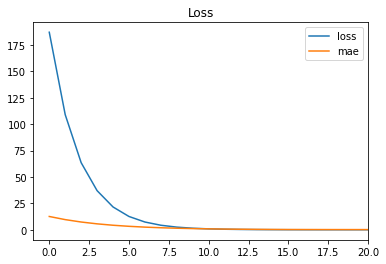

In [ ]:
#20 epochs까지 loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

## 2-9. 검증
- 모델 인스턴스의 **`evaluate()`** 메서드로 모델의 성능을 검증할 수 있다. 일반적으로 검증 데이터셋을 입력하여 검증한다.
- **훈련 데이터셋을 입력하여 반환된 결과**를 확인하면 모델 훈련 단계의 **마지막 epoch가 종료된 상태에서 출력된 값**과 같다.
- **검증 단계에서는 모델이 훈련을 마친 상태의 가중치를 그대로 적용하여 손실과 평가지표를 계산**하기 때문이다.

## 2-10. 예측
- 훈련이 완료된 모델 인스턴스의 **`predict()`** 메서드에 새로운 입력 데이터를 리스트로 넣어주면 모델의 예측 값을 얻을 수 있다.
- x 인자로 숫자 10을 리스트 형태로 입력하면 실제 값인 32와 매우 유사한 값을 예측한다.

In [ ]:
model.evaluate(x,y)

1/1 [==============================] - 0s 130ms/step - loss: 4.7417e-05 - mae: 0.0059


[4.7416840970981866e-05, 0.005910396575927734]

In [ ]:
model.predict([10])  #y=32

1/1 [==============================] - 0s 175ms/step


array([[32.028564]], dtype=float32)

## 3. 심층 신경망으로 이미지 분류
- 심층 신경망으로 이미지 분류 모델을 생성한다.
- 이미지 분류를 위해 단층이 아닌 더 깊은 층을 쌓아 깊이가 있는 딥러닝 모델을 생성한다.
- 훈련에 필요한 데이터셋은 케라스 내장 데이터셋을 가져와서 사용하고, 분류에 적합한 손실함수를 적용하고 결과를 확인한다.

## 3-1. 케라스 내장 데이터셋 로드
- 케라스는 모델 훈련에 필요한 샘플 데이터셋을 제공한다.
- 데이터셋은 **`tenserflow.keras.datasets`** 서브패키지에 위치한다.
- 서브패키지에서 mnist 손글씨 데이터셋을 불러와서 mnist 변수에 저장한다.
- **`load_data()`** 메서드를 적용하여 google의 storage로부터 넘파이 배열로 구성된 데이터셋을 다운로드 받는다. 
- 앞서 설명한 것처럼 훈련 데이터셋과 검증 데이터셋을 반환하기 때문에 훈련 셋과 검증 셋을 튜플 형태로 정의한다.
- x_train, y_train은 각각 훈련 셋의 입력과 출력 데이터를 나타낸다. 마찬가지로 x_test, y_test는 검증 셋의 입력과 출력 데이터를 나타낸다.
- 훈련 셋에는 60000개, 검증 셋에는 10000개 데이터가 저장되어 있다.
- 입력 데이터인 x_train, x_test에는 mnist 손글씨 이미지 데이터가 저장되어 있고 배열의 shape는 (데이터셋 크기, 28, 28)이다. 28, 28은 이미지의 세로와 가로 픽셀 크기를 나타낸다.

In [ ]:
import tensorflow as tf
#케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [ ]:
#google의 storage로부터 load_data()로 데이터셋 로드 
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#로드된 데이터셋 확인
print('train set :', x_train.shape, y_train.shape)
print('test set :', x_test.shape, y_test.shape)

train set : (60000, 28, 28) (60000,)
test set : (10000, 28, 28) (10000,)


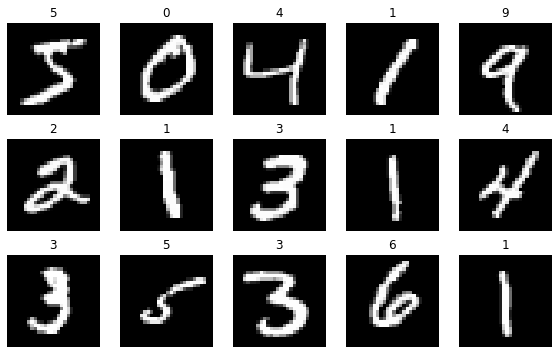

In [ ]:
#시각화
#canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]
  #imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))
plt.tight_layout()
plt.show()

## 3-2. 데이터 전처리
- 이미지 데이터에 대하여 정규화를 통해 데이터의 범위를 조절한다. 
- 데이터를 확인해보면 0부터 255까지 범위의 값으로 이루어진 것을 확인할 수 있다. 데이터의 범위가 0~1 사이의 값을 갖도록 정규화하기 위해서는 데이터의 최대값인 255로 나눈다.

In [ ]:
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [ ]:
#픽셀 값의 최소/최댓값 확인
print(f'정규화 전] 최소값 : {x_train.min()}, 최댓값 : {x_train.max()}')

#데이터 정규화
x_train = x_train/x_train.max()
#정규화 후 최소/최댓값 확인
print(f'정규화 후] 최소값 : {x_train.min()}, 최댓값 : {x_train.max()}')

정규화 전] 최소값 : 0, 최댓값 : 255
정규화 후] 최소값 : 0.0, 최댓값 : 1.0


In [ ]:
#test 셋에도 정규화 동일 적용
x_test = x_test/x_test.max()

#변환 후 x_train 배열의 데이터 다시 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

## 3-3. Flatten 레이어
- 샘플 이미지의 형태는 (28,28)로 2차원 입력이다. 2차원 입력은 Dense 레이어에 입력값으로 넣을 수 없으므로 이미지 데이터를 1차원으로 전처리하여 주입해야 한다.
- 또는 **`Flatten`** 레이어를 사용하여 다차원 데이터를 1차원으로 펼쳐주는 방법도 가능하다. 적용한 결과 shape이 (60000, 784)가 되는데 784는 가로 세로 픽셀 수를 곱한 28*28의 값이다.

## 3-4. 활성화 함수
- 활성화 함수는 입력을 비선형 출력으로 변환해주는 함수이다. 일반적으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현되기도 한다.
- 자주 사용되는 활성화 함수로는 시그모이드(Sigmoid), 하이퍼볼릭 탄젠트(Hyperbolic Tangent), ReLU, Leaky ReLU 등이 있다.
- 텐서플로 케라스 레이어에 활성화 함수를 적용하고 싶다면 다음과 같이 설정한다. Dense 레이어에 ReLU 활성화 함수를 적용하기 위해서는 **`activation='relu'`**로 입력한다.
- 다음과 별도의 층으로 적용할 수도 있는데, Dense 레이어 다음에 배치 정규화를 적용한 후 활성화 함수를 적용하고자 할때 많이 사용된다.

In [ ]:
print(f'변경 전 shape : {x_train.shape}')
print(f'1D로 shape 변경 후 : {x_train.reshape(60000,-1).shape}')

변경 전 shape : (60000, 28, 28)
1D로 shape 변경 후 : (60000, 784)


In [ ]:
print(f'변경 전 shape : {x_train.shape}')
#Flatten 레이어 적용
print(f'Flatten 적용 후 : {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape : (60000, 28, 28)
Flatten 적용 후 : (60000, 784)


In [ ]:
#Dense레이어에 relu 활성화 함수 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [ ]:
#Dense레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

## 3-5. 입력과 출력
- 딥러닝 모델을 만들 때는 첫번째 레이어에 입력 데이터의 형태를 나타내는 input_shape 매개변수를 지정하는 것이 일반적이다. 앞에서 x_train의 shape이 (60000, 28, 28) 배열임을 확인하였다.
- 여기서 데이터셋의 크기를 나타내는 60000을 제외하고, 이미지의 세로, 가로 형태를 나타내는 **`input_shape=(28, 28)`**를 지정한다.
- 출력층의 노드 개수가 2개 이상인 경우, 즉 다중 분류 문제에서는 **`softmax`** 활성화 함수를 적용한다. 
- 반면 이진 분류 모델의 출력층 노드 개수를 1개로 설정한 경우에는 **`sigmoid`** 활성화 함수를 적용한다.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') #노드개수=10개=클래스개수
])

In [ ]:
#출력층 노드=1, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

#출력층 노드=2개이상, softmax
tf.keras.layers.Dense(10, activation='softmax')

## 3-6. 손실함수
- 분류 모델의 손실함수는 모델의 출력층에 따라 올바른 손실함수를 적용해야만 모델이 정상적으로 훈련할 수 있다. 
- 이진 분류기 생성 시 **출력층의 노드 개수가 1개**면 **활성화 함수**로 **`activation='sigmoid'`**를 지정하며, **손실함수**는 **`binary_crossentropy`**를 지정한다.
- **출력층의 노드 개수가 2개 이상**이면 **활성화 함수**로 **`activation='softmax'`**를 지정하며, **손실함수**는 **`categorical_crossentropy 또는 sparse_categorical_crossentropy`**를 지정한다.
- **출력 데이터가 원핫 벡터**인 경우에는 **`categorical_crossentropy`**를 지정하고, **원핫 벡터가 아닌 경우**에는 **`sparse_categorical_crossentropy`**를 지정한다.

In [ ]:
#이진 분류(출력 노드 개수=1, sigmoid)
model.compile(loss='binary_crossentropy')

In [ ]:
#y가 원핫벡터 [0., 0., 0., 1., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

#y가 원핫벡터 아닐 경우 [5]
model.compile(loss='sparse_categorical_crossentropy')

## 3-7. 옵티마이저
- 옵티마이저는 손실을 낮추기 위해서 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법이다.
- 일반적으로 많이 사용되는 알고리즘은 **`Adam`**이다.
- 옵티마이저는 클래스 인스턴스로 지정하거나 문자열로 지정할 수 있다. 문자열로 지정할 때는 클래스 이름을 소문자로 표기하면 된다. 
- 클래스 인스턴스로 지정할 때는 문자열 지정과는 다르게 학습률(lr)과 같은 하이퍼파라미터를 직접 설정할 수 있다.

In [ ]:
#클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

#문자열로 지정
model.compile(optimizer='adam')   

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## 3-8. 평가지표
- 분류 모델에 대한 평가지표는 정확도를 나타내는 'accuracy'가 가장 많이 사용되며, 'auc', 'precision', 'recall' 등의 지표도 많이 사용된다.
- 모델 컴파일 단계에서 **`metrics`** 매개변수에 파이썬 리스트 형태로 하나 이상의 평가지표를 지정하여 여러 지표들을 동시에 참고할 수 있다.
- 평가지표도 옵티마이저와 마찬가지로 클래스 인스턴스로 지정하거나 문자열로 지정할 수 있다.

In [ ]:
#클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[acc])

#문자열로 지정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## 3-9. 훈련
- 앞서 선형회귀 모델을 학습시킬 때는 별도의 검증 데이터셋을 만들지 않았지만, mnist 손글씨 데이터셋은 별도의 검증 셋이 존재한다.
- 모델을 훈련할 때 검증 셋을 추가 지정하면, 매 epoch마다 훈련 손실과 검증 손실, 각 셋에 대한 평가지표를 나란히 출력한다. 검증 셋을 지정하는 방법은 **`validation_data`** 매개변수에 튜플 형식의 검증 셋을 지정하면 된다.
- 아래 코드는 epoch를 10회로 지정하여 훈련한다.

## 3-10. 평가
- 10회의 epoch가 끝나고 훈련이 종료되면 **`evaluate()`** 메서드로 모델 성능을 검사하고 평가 검사를 확인할 수 있다.
- 이때 검증 셋인 x_test와 y_test를 함수에 전달한다.
- **`evaluate()`** 메서드는 컴파일 단계에서 지정한 손실과 정확도를 순서대로 반환하며, 그 중 정확도만 지정하여 출력해보면 모델의 검증 성능이 약 98.2%를 기록한 것을 확인할 수 있다.

In [ ]:
model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), #검증 셋 지정
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2264 - accuracy: 0.9327 - val_loss: 0.1197 - val_accuracy: 0.9626
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0956 - accuracy: 0.9705 - val_loss: 0.0789 - val_accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0653 - accuracy: 0.9800 - val_loss: 0.0838 - val_accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.0867 - val_accuracy: 0.9727
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0392 - accuracy: 0.9875 - val_loss: 0.0823 - val_accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0330 - accuracy: 0.9893 - val_loss: 0.0875 - val_accuracy: 0.9777
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0298 - accuracy: 0.9901 - val_loss: 0.0783 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('검증 셋 정확도 :', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.9816
검증 셋 정확도 : 0.9815999865531921


## 3-10. 예측
- **`predict()`** 메서드에 이미지 데이터를 넣어주면 새로운 이미지에 대한 분류 값을 예측하여 반환한다.
- 결과는 **모델이 예측한 분류 결과를 넘파이 배열 형태로 반환**한다.
- 첫번째 이미지에 대한 분류 결과를 출력해보면 다음과 같이 10개의 확률값들이 출력된다.
- 모델의 마지막 출력층의 노드 개수가 10개로 지정되어 10개 값이 출력된 것이다. softmax 활성화 함수를 거친 10개의 출력 값은 순차적으로 0부터 9까지 **10개의 개별 클래스에 대한 분류 확률값**을 나타낸다. 
- 이 중 **가장 높은 확률값을 가진 클래스가 최종 예측된 클래스**이다.

In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
predictions[0]

array([6.1890082e-13, 1.3037810e-09, 3.2666503e-10, 5.4522582e-07,
       9.8051496e-09, 1.0959212e-08, 2.7947288e-16, 9.9999899e-01,
       3.7784936e-08, 2.7017083e-07], dtype=float32)

In [ ]:
#0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

#첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 2 9]


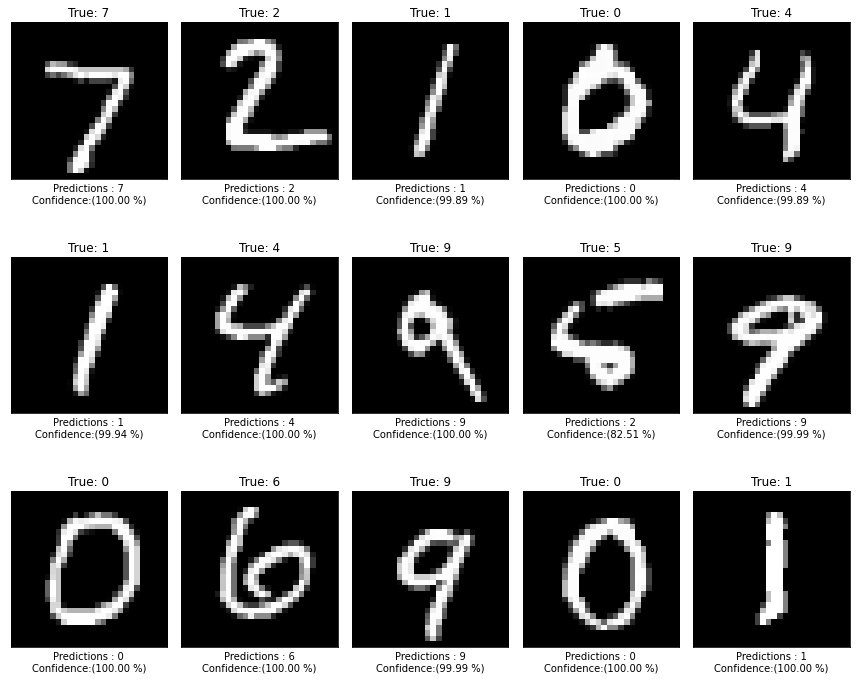

In [ ]:
#15개 예측한 결과에 대한 시각화
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100 * np.max(predictions[idx])
  return img, y_true, y_pred, confidence

#canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)

  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Predictions : {y_pred}\nConfidence:({confidence:.2f} %)')

plt.tight_layout()
plt.show()

## 4. 모델 세부 설정
## 4-1. 초기값 설정
- 레이어의 초기화 방법을 다르게 설정할 수 있다.
- Dense 레이어는 기본 초기화 방법으로 GlorotUniform 초기화 방법이 설정되어 있다. 
- 기본값으로 설정된 GlorotUniform 초기화 방법을 HeNormal로 변경하기 위해서는 **`kernel_initializer`** 매개변수에 설정한다.
- 옵티마이저, 손실함수와 마찬가지로 문자열로 지정하는 방법과 클래스 인스턴스로 지정하는 방법이 있다.

In [ ]:
import tensorflow as tf
#케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

#google의 storage로부터 load_data()로 데이터셋 로드 
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#로드된 데이터셋 확인
print('train set :', x_train.shape, y_train.shape)
print('test set :', x_test.shape, y_test.shape)

#데이터 정규화
x_train=x_train/x_train.max() #255
x_test=x_test/x_test.max() #255

train set : (60000, 28, 28) (60000,)
test set : (10000, 28, 28) (10000,)


In [ ]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [ ]:
#문자열 초기화
dense = tf.keras.layers.Dense(356, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

#클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


## 4-2. 규제
- 모델의 과대적합을 해소하기 위해 L1, L2 규제를 적용하기도 한다.
- 텐서플로 케라스 레이어는 기본값으로 규제를 적용하지 않고 있으므로, 규제를 적용하기 위해서는 별도로 설정해주어야 한다.
- 규제를 적용하기 위해서는 **`kernel_regularizer`**에 규제를 지정한다. 케라스에서 지원하는 규제는 L1, L2 규제가 있다.

In [ ]:
#기본값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_23',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [ ]:
#L1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

#클래스 인스턴스 적용, alpha=0.1
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


## 4-3. 드롭아웃
- **드롭아웃**은 딥러닝 모델의 가장 큰 난제인 **과대적합 문제를 해결하기 위해 제안된 아이디어**이며, 시물적으로 상당히 좋은 효과를 보인다.
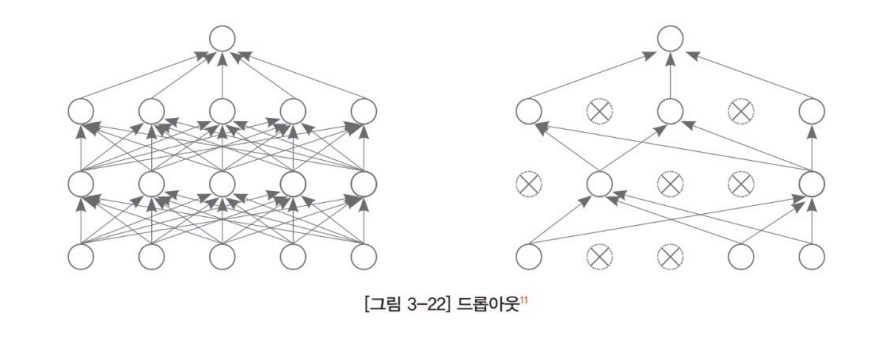
- 왼쪽 그림을 보면 모든 노드들이 연결되어 있으나, 오른쪽 그림은 모든 노드가 연결되지 않고 확률적으로 몇 개의 신호는 끊겨 있다. 
- 이렇게 **노드의 일부 신호를 임의로 삭제**하게 되면 모델이 **학습하는 가중치 파라미터의 개수가 현저하게 줄어들기 때문**에 모델이 쉽게 **과대적합 되는 것을 방지**할 수 있다.
- 중요한 점은 **모델이 훈련**할 때는 드롭아웃이 적용되어 **노드 중 일부만 훈련**하지만, **예측 시점에는 모든 노드가 활용된다**는 점이다.
- 케라스에서 드롭아웃은 아래의 코드와 같이 적용하며, **`Dropout`** 레이어 함수에 입력하는 숫자는 노드에서 제거되는 비율을 나타낸다.

In [ ]:
#Dropout 25% 비율 적용 ( 25%의 노드가 삭제 )
tf.keras.layers.Dropout(0.25)

## 4-4. 배치 정규화
- **배치 정규화**는 **각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화**한다. 다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련이 가능하고 성능을 크게 향상시킬 수 있다.
- 배치 정규화 층은 케라스에서 클래스 함수로 지원하기 때문에 별도로 코드로 구현할 필요가 없고 클래스 인스턴스를 생성하여 추가하면 된다.
- Dense 레이어에 ReLU 활성화 함수를 추가한 모델을 model_a, 배치 정규화를 적용 후 ReLU 활성화 함수를 추가한 모델을 model_b로 생성하여 성능을 비교한다.
- 배치 정규화만 추가하여도 손실은 이전 대비 더 안정적이고 빠르게 수렴한다. 

In [ ]:
#Model A : Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_a.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                50240     
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Model B : Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])
model_b.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

## 4-5. 활성화 함수
- 지금까지는 주로 Dense 레이어에 ReLU 활성화 함수를 지정했다.
- 케라스가 지원하는 다른 활성화 함수를 적용해볼 수 있는데, 활성화 함수를 적용할 때 다음과 같이 클래스 인스턴스로 선언하여 하이퍼파라미터 값을 변경하여 적용할 수 있다.
---
- 앞에서 생성한 model_a, model_b와 LeakyReLU 활성화 함수로 변경한 model_c까지 3개의 모델을 동일한 조건으로 10번의 epoch 동안 훈련한 후에 수렴 속도를 확인한다.
- 또한 결과를 시각화하여 epoch 별 검증 손실의 감소 추이를 확인할 수 있다.
- 실행 결과를 보면 mnist 데이터셋에서는 모델별 차이가 크지 않다. 그러나 좀 더 복잡한 데이터셋을 다룬다면 배치 정규화와 다른 활성화 함수를 적용해 보면서 모델의 훈련 추이를 관찰해 볼 필요가 있다.

In [ ]:
#LeakyReLu 기본 설정
tf.keras.layers.LeakyReLU()

#LeakyReLU, 인스턴스로 선언하여 하이퍼파라미터 alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [ ]:
#Model C : Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #LeakyReLU, alpha=0.2
    tf.keras.layers.LeakyReLU(alpha = 0.2),

    tf.keras.layers.Dense(32),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.LeakyReLU(alpha = 0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])
model_c.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

In [ ]:
#앞의 3개의 모델 동일한 조건으로 10번 epoch동안 훈련한 후 수렴 속도 확인
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Model A
history_a = model_a.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
#Model B
history_b = model_b.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
#Model C
history_c = model_c.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

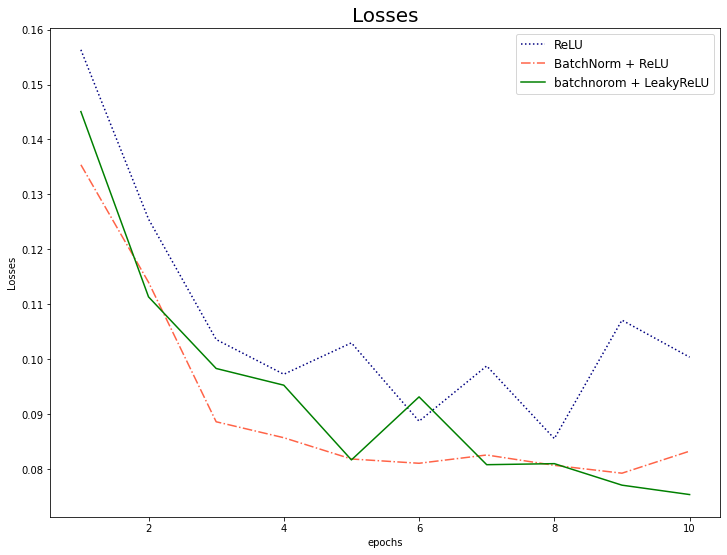

In [ ]:
#시각화
plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1,11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1,11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU', 'batchnorom + LeakyReLU'], fontsize=12)
plt.show()